In [28]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import folium
import plotly.express as px
import statsmodels.api as sm

In [2]:
df_summons = pd.read_csv("datasets/NYPD_B_Summons__Year_to_Date_.csv")
df_summons

,EVNT_KEY,VIOLATION_DATE,VIOLATION_TIME,CHG_LAW_CD,VIOLATION_CODE,VEH_CATEGORY,CITY_NM,RPT_OWNING_CMD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Location Point,JURIS_CD
0,239079620,01/13/2022,12:25:00,VTL,1180D,CAR/SUV,STATEN ISLAND,122,965006,159201,40.603625,-74.069302,POINT (-74.06930238 40.60362534),1
1,239648211,01/25/2022,10:24:00,NYC,403A1,CAR/SUV,MANHATTAN,1,980541,199857,40.715237,-74.013379,POINT (-74.01337938 40.71523721),1
2,241452758,03/02/2022,10:29:12,VTL,5091,CAR/SUV,BRONX,52,1017478,256069,40.869470,-73.879861,POINT (-73.8798608037303 40.8694704770483),1
3,240915437,02/19/2022,06:53:30,NYC,406A2,CAR/SUV,QUEENS,112,1025401,202586,40.722641,-73.851542,POINT (-73.8515418216779 40.7226409964758),1
4,238942415,01/11/2022,11:03:04,VTL,1180D,TRUCK/BUS,MANHATTAN,6,984338,208351,40.738552,-73.999682,POINT (-73.99968244 40.73855195),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437067,251014999,09/13/2022,18:15:00,VTL,1172A,CAR/SUV,MANHATTAN,34,1006487,253905,40.863557,-73.919606,POINT (-73.91960608 40.86355719),1
437068,251717441,09/28/2022,14:55:00,VTL,5091,CAR/SUV,QUEENS,110,1019894,212168,40.748957,-73.871357,POINT (-73.87135711 40.74895683),1
437069,251820723,09/30/2022,09:08:45,VTL,1111D1N,CAR/SUV,MANHATTAN,10,985808,215574,40.758377,-73.994376,POINT (-73.99437622 40.75837713),1
437070,250766737,09/08/2022,11:30:00,VTL,1229C3,CAR/SUV,BRONX,40,1007914,232775,40.805558,-73.914522,POINT (-73.91452156 40.80555776),1


In [25]:
df_summons['DATE'] = pd.to_datetime(df_summons['VIOLATION_DATE'])
df_summons['MONTH'] = pd.DatetimeIndex(df_summons['DATE']).month
df_summons['YEAR'] = pd.DatetimeIndex(df_summons['DATE']).year
df_summons['DAY_OF_WEEK'] = df_summons['DATE'].dt.day_name()

In [3]:
df_collisions = pd.read_csv("datasets/Motor_Vehicle_Collisions_-_Crashes.csv")
df_collisions

C:\Users\ttomn\AppData\Local\Temp\ipykernel_7284\613017635.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_collisions = pd.read_csv("datasets/Motor_Vehicle_Collisions_-_Crashes.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949625,11/29/2022,2:20,STATEN ISLAND,10305.0,40.611940,-74.070380,"(40.61194, -74.07038)",NaN,NaN,255 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,4585934,Sedan,NaN,NaN,NaN,NaN
1949626,11/29/2022,15:05,BROOKLYN,11220.0,40.639854,-74.012200,"(40.639854, -74.0122)",57 STREET,6 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4586337,Sedan,Distributo,NaN,NaN,NaN
1949627,11/24/2022,22:00,NaN,NaN,40.812073,-73.936040,"(40.812073, -73.93604)",EAST 135 STREET,MADISON AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4586345,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1949628,10/18/2022,15:00,NaN,NaN,40.797035,-73.929825,"(40.797035, -73.929825)",EAST 120 STREET,PLEASANT AVENUE,NaN,...,NaN,NaN,NaN,NaN,4586360,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [63]:
df_collisions['DATE'] = pd.to_datetime(df_collisions['CRASH DATE'])
df_collisions['MONTH'] = pd.DatetimeIndex(df_collisions['DATE']).month
df_collisions['YEAR'] = pd.DatetimeIndex(df_collisions['DATE']).year
df_collisions['DAY_OF_WEEK'] = df_collisions['DATE'].dt.day_name()

In [60]:
amount_per_day = df_collisions.groupby("CRASH DATE").size()
fft_dates = np.fft.fft(amount_per_day)
centralized_fft = np.fft.fftshift(fft_dates)
half_fft = centralized_fft[:centralized_fft.shape[0]//2+1]
fig = px.scatter(x=np.arange(half_fft.shape[0]), y=np.log(np.abs(half_fft)))
fig.show()

In [ ]:
amount_per_day

In [19]:
fig = px.scatter(x=np.arange(half_fft.shape[0]), y=np.angle(half_fft))
fig.show()

In [64]:
amount_per_dayofweek = df_collisions.groupby("DAY_OF_WEEK").size()
amount_per_dayofweek

DAY_OF_WEEK
Friday       311212
Monday       278785
Saturday     261930
Sunday       232501
Thursday     291922
Tuesday      287786
Wednesday    285494
dtype: int64

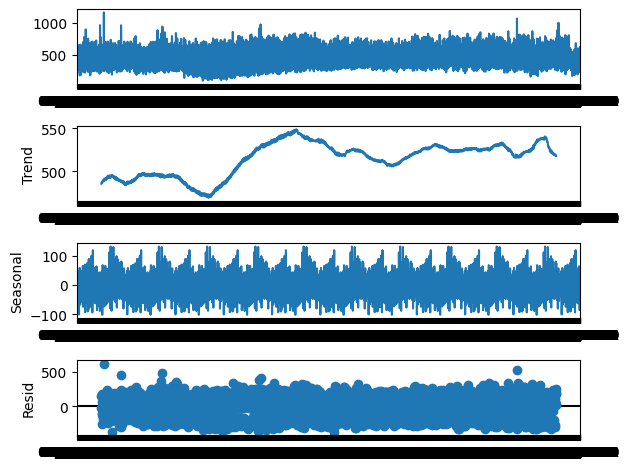

In [61]:
res = sm.tsa.seasonal_decompose(amount_per_day, period=365)
resplot = res.plot()

In [51]:
x = pd.DataFrame(amount_per_day)
x.columns

Index(['EVNT_KEY'], dtype='object')

In [56]:
amount_per_day = df_collisions.groupby("CRASH DATE").size()
amount_per_day

CRASH DATE
01/01/2013    381
01/01/2014    399
01/01/2015    395
01/01/2016    393
01/01/2017    485
             ... 
12/31/2017    462
12/31/2018    622
12/31/2019    443
12/31/2020    278
12/31/2021    232
Length: 3804, dtype: int64